In [25]:
import pandas as pd
import numpy as np
from datetime import datetime
import autosklearn.classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns


RANDOM_SEED = 33

# Importando dados

In [2]:
PATH_PETR4_TABULAR_TRAIN = 'FinalDatasets/PETR4/PETR4_tabular_train.csv'
PATH_PETR4_TABULAR_TEST = 'FinalDatasets/PETR4/PETR4_tabular_test.csv'

# PETR4
df_petr4_train = pd.read_csv(PATH_PETR4_TABULAR_TRAIN)
df_petr4_test = pd.read_csv(PATH_PETR4_TABULAR_TEST)

X_petr4_train = df_petr4_train.drop(['hasRise', 'Date'], axis='columns')
y_petr4_train = df_petr4_train['hasRise']

X_petr4_test = df_petr4_test.drop(['hasRise', 'Date'], axis='columns')
y_petr4_test = df_petr4_test['hasRise']

In [3]:
PATH_VALE3_TABULAR_TRAIN = 'FinalDatasets/VALE3/VALE3_tabular_train.csv'
PATH_VALE3_TABULAR_TEST = 'FinalDatasets/VALE3/VALE3_tabular_test.csv'

# vale3
df_vale3_train = pd.read_csv(PATH_VALE3_TABULAR_TRAIN)
df_vale3_test = pd.read_csv(PATH_VALE3_TABULAR_TEST)

X_vale3_train = df_vale3_train.drop(['hasRise', 'Date'], axis='columns')
y_vale3_train = df_vale3_train['hasRise']

X_vale3_test = df_vale3_test.drop(['hasRise', 'Date'], axis='columns')
y_vale3_test = df_vale3_test['hasRise']

In [26]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    # Plotar a matriz de confusão
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

    # Nomear os eixos
    plt.xlabel('Predito', fontsize=14)
    plt.ylabel('Verdadeiro', fontsize=14)

    # Adicionar rótulos dos eixos X e Y
    plt.xticks([0.5, 1.5], ['Classe 0', 'Classe 1'])
    plt.yticks([0.5, 1.5], ['Classe 0', 'Classe 1'])

    # Adicionar título
    plt.title('Matriz de Confusão', fontsize=16)

    # Exibir o gráfico
    plt.show()

# Autosklearn

## PETR4

In [4]:
train_time_seconds = 15*60 #  15 minutos
per_run_time_limit = 0.1*train_time_seconds



automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=train_time_seconds,  # total time in seconds
                                                          per_run_time_limit=per_run_time_limit,       # time limit for each model
                                                          ensemble_nbest=20,
                                                          initial_configurations_via_metalearning=25,
                                                          seed=RANDOM_SEED,
                                                          n_jobs=-1)


automl.fit(np.array(X_petr4_train), np.array(y_petr4_train))


AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      ensemble_nbest=20, n_jobs=-1, per_run_time_limit=90.0,
                      seed=33, time_left_for_this_task=900)

### Avaliação 

Abaixo, exibimos os experimentos ordenados dos melhores resultados até os piores resultados. Note que o classificador `passive_aggressive` do auto-sklearn dominou os 10 melhores resultados

In [22]:
pd.DataFrame(automl.cv_results_).sort_values(by = 'mean_test_score', ascending = False)

,mean_test_score,rank_test_scores,mean_fit_time,params,status,budgets,param_balancing:strategy,param_classifier:__choice__,param_data_preprocessor:__choice__,param_feature_preprocessor:__choice__,...,param_data_preprocessor:feature_type:numerical_transformer:rescaling:robust_scaler:q_max,param_data_preprocessor:feature_type:numerical_transformer:rescaling:robust_scaler:q_min,param_feature_preprocessor:fast_ica:n_components,param_feature_preprocessor:kernel_pca:coef0,param_feature_preprocessor:kernel_pca:degree,param_feature_preprocessor:kernel_pca:gamma,param_feature_preprocessor:nystroem_sampler:coef0,param_feature_preprocessor:nystroem_sampler:degree,param_feature_preprocessor:nystroem_sampler:gamma,param_feature_preprocessor:select_rates_classification:mode
608,0.632,1,0.445626,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,passive_aggressive,feature_type,polynomial,...,0.914444,0.075329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576,0.632,1,0.503407,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,passive_aggressive,feature_type,polynomial,...,0.917541,0.073061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
522,0.632,1,0.519731,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,passive_aggressive,feature_type,polynomial,...,0.925470,0.075329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526,0.632,1,0.481564,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,passive_aggressive,feature_type,polynomial,...,0.929748,0.075329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
531,0.632,1,0.460983,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,passive_aggressive,feature_type,polynomial,...,0.925470,0.075329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.000,528,0.660985,"{'balancing:strategy': 'none', 'classifier:__c...",Crash,0.0,none,qda,feature_type,kernel_pca,...,NaN,NaN,NaN,0.965185,3.0,0.002748,NaN,NaN,NaN,NaN
417,0.000,528,0.463182,"{'balancing:strategy': 'weighting', 'classifie...",Crash,0.0,weighting,gradient_boosting,feature_type,select_rates_classification,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fpr
68,0.000,528,0.607890,"{'balancing:strategy': 'none', 'classifier:__c...",Crash,0.0,none,adaboost,feature_type,no_preprocessing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,0.000,528,90.256271,"{'balancing:strategy': 'weighting', 'classifie...",Timeout,0.0,weighting,libsvm_svc,feature_type,no_preprocessing,...,0.840137,0.116837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Resultados no conjunto de teste

In [9]:
y_pred = automl.predict(X_petr4_test)

In [11]:
print(classification_report(y_petr4_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.64      0.51        55
           1       0.50      0.30      0.37        67

    accuracy                           0.45       122
   macro avg       0.46      0.47      0.44       122
weighted avg       0.47      0.45      0.44       122



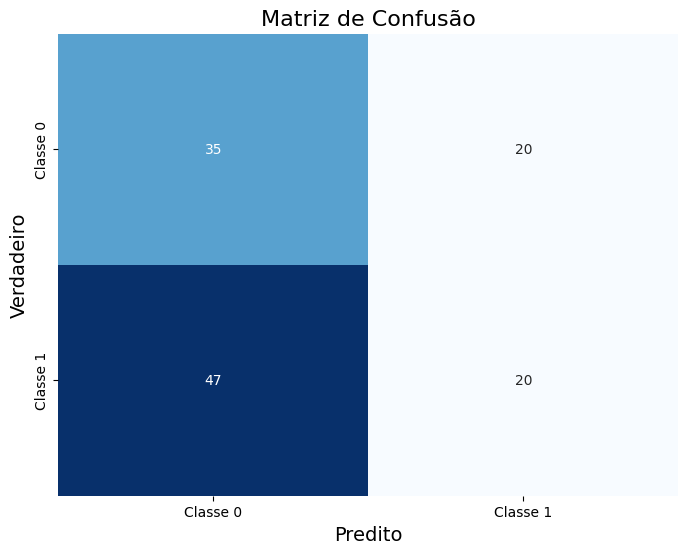

In [27]:
plot_confusion_matrix(y_petr4_test, y_pred)

## VALE3

In [ ]:
train_time_seconds = 15*60 #  15 minutos
per_run_time_limit = 0.1*train_time_seconds



automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=train_time_seconds,  # total time in seconds
                                                          per_run_time_limit=per_run_time_limit,       # time limit for each model
                                                          ensemble_nbest=20,
                                                          initial_configurations_via_metalearning=25,
                                                          seed=RANDOM_SEED,
                                                          n_jobs=-1)


automl.fit(np.array(X_petr4_train), np.array(y_petr4_train))


AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      ensemble_nbest=20, n_jobs=-1, per_run_time_limit=90.0,
                      seed=33, time_left_for_this_task=900)

### Avaliação 

Abaixo, exibimos os experimentos ordenados dos melhores resultados até os piores resultados. Note que o classificador `passive_aggressive` do auto-sklearn dominou os 10 melhores resultados

In [ ]:
pd.DataFrame(automl.cv_results_).sort_values(by = 'mean_test_score', ascending = False)

,mean_test_score,rank_test_scores,mean_fit_time,params,status,budgets,param_balancing:strategy,param_classifier:__choice__,param_data_preprocessor:__choice__,param_feature_preprocessor:__choice__,...,param_data_preprocessor:feature_type:numerical_transformer:rescaling:robust_scaler:q_max,param_data_preprocessor:feature_type:numerical_transformer:rescaling:robust_scaler:q_min,param_feature_preprocessor:fast_ica:n_components,param_feature_preprocessor:kernel_pca:coef0,param_feature_preprocessor:kernel_pca:degree,param_feature_preprocessor:kernel_pca:gamma,param_feature_preprocessor:nystroem_sampler:coef0,param_feature_preprocessor:nystroem_sampler:degree,param_feature_preprocessor:nystroem_sampler:gamma,param_feature_preprocessor:select_rates_classification:mode
608,0.632,1,0.445626,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,passive_aggressive,feature_type,polynomial,...,0.914444,0.075329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576,0.632,1,0.503407,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,passive_aggressive,feature_type,polynomial,...,0.917541,0.073061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
522,0.632,1,0.519731,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,passive_aggressive,feature_type,polynomial,...,0.925470,0.075329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526,0.632,1,0.481564,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,passive_aggressive,feature_type,polynomial,...,0.929748,0.075329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
531,0.632,1,0.460983,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,passive_aggressive,feature_type,polynomial,...,0.925470,0.075329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.000,528,0.660985,"{'balancing:strategy': 'none', 'classifier:__c...",Crash,0.0,none,qda,feature_type,kernel_pca,...,NaN,NaN,NaN,0.965185,3.0,0.002748,NaN,NaN,NaN,NaN
417,0.000,528,0.463182,"{'balancing:strategy': 'weighting', 'classifie...",Crash,0.0,weighting,gradient_boosting,feature_type,select_rates_classification,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fpr
68,0.000,528,0.607890,"{'balancing:strategy': 'none', 'classifier:__c...",Crash,0.0,none,adaboost,feature_type,no_preprocessing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,0.000,528,90.256271,"{'balancing:strategy': 'weighting', 'classifie...",Timeout,0.0,weighting,libsvm_svc,feature_type,no_preprocessing,...,0.840137,0.116837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Resultados no conjunto de teste

In [ ]:
y_pred = automl.predict(X_petr4_test)

In [ ]:
print(classification_report(y_petr4_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.64      0.51        55
           1       0.50      0.30      0.37        67

    accuracy                           0.45       122
   macro avg       0.46      0.47      0.44       122
weighted avg       0.47      0.45      0.44       122



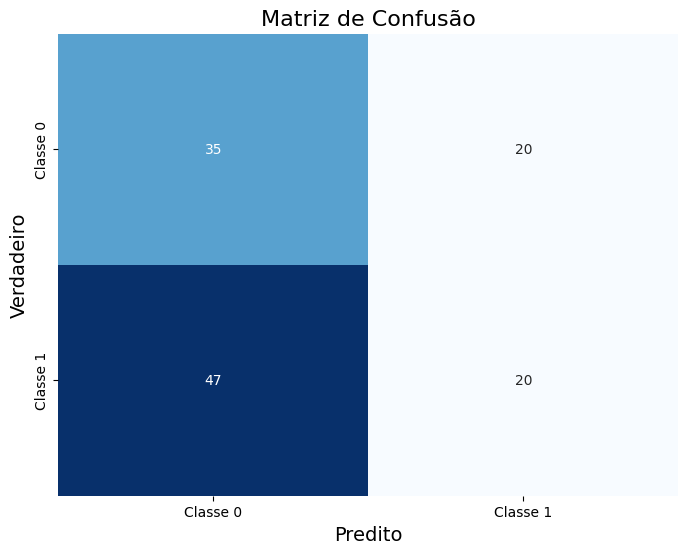

In [ ]:
plot_confusion_matrix(y_petr4_test, y_pred)